## 1. Simulating dataset

**Dataset is generated and evaluated via two schemes:**
1. A set of 100 users - 3 questions initially with defined values of difficulty, discrimination & guess to calculate 100 P(i,j) values & later extended by 10 bernouli trials for each user-item pair corresponding  to a prob. value of success(response).
2. likewise, a set of 100 users-100 questions with defined values of difficulty, discrimination & guess to calculate 100 P(i,j) values. [No Bernoulli trails]

* **In following:**

    **a.) tpm functions: outputs 3PL likelihood values of responding to all 3 items by particular user.**
    
    **b.) sim_data: outputs list of tuples containing values in format (user, question/item, response).**

In [1]:
def tpm(diff, latent, guess, disc):
    #guess= np.random.normal(0, 1, size=len(diff))#for all n items
    #disc=np.random.normal(0, 1, size=len(diff))#for all n items    
    prob_per_user = list()
    
    for i, j, k in list(zip(guess, disc, diff)):
        prob_per_user.append(i+ (1- i)*(np.exp(j*(latent-k))/(1+np.exp(j*(latent-k)))))
        
    return prob_per_user

In [2]:
def sim_data(l_trait, num_items):
    difficulty= np.linspace(-0.5, 0.5, num=num_items)#for all n items #np.random.normal--?
    guess_vals= np.linspace(0, 1, num= num_items)#for all n items #np.random.normal--?
    disc_vals=np.linspace(0, 1, num= num_items)#for all n items #np.random.normal--?
    
    items= list(range(num_items))#for all n items
    data_li= list()
    for idx, val in enumerate(l_trait):
        data_li= data_li+ list(zip([idx]*num_items, items,
                                   tpm(diff= difficulty, latent= val, guess=guess_vals, disc=disc_vals)))
    
    return data_li, difficulty, disc_vals, guess_vals 

### 1.1 Dataset scheme 1

* **Obtaining 100 values corresponding to latent abilties of 100 users from a random normal distribution**

In [3]:
import pandas as pd
import numpy as np
#from numpy.random import seed
#seed(1)

ltrait_new = np.linspace(-4,4, num=100)#np.random.normal(0, 1, size=100)
num_sim_users = ltrait_new.shape[0]
num_sim_items = 3
print('# of sim user:',num_sim_users,'\n# of sim items:',num_sim_items)

# of sim user: 100 
# of sim items: 3


* **Obatining probabilty values for 100 users corresponding to each of 3 questions.**

In [4]:
df_cols = ['user','questions', 'response']#final dataframe cols
#difficulty= [-0.5,0,0.5]

data_list, t_diff, t_disc, t_guess = sim_data(ltrait_new, num_items= num_sim_items)#for 3 items
df_sim = pd.DataFrame(data_list, columns=df_cols)
#df_sim = df_sim.loc[np.random.randint(0,df_sim.shape[0]-1, size=df_sim.shape[0])]#shuffling data
df_sim.head(5)

,user,questions,response
0,0,0,0.500000
1,0,1,0.559601
2,0,2,1.000000
3,1,0,0.500000
4,1,1,0.561755


### 1.2 Dataset scheme 2


* **Obtaining 100 values corresponding to latent abilties of 100 users from a random normal distribution**

In [5]:
ltrait_new = np.random.normal(0, 1, size=100)
num_sim_users = ltrait_new.shape[0]
num_sim_items_s2 = 100
print('# of sim user:',num_sim_users,'\n# of sim items for scheme 2:',num_sim_items_s2)

# of sim user: 100 
# of sim items for scheme 2: 100


* **Obatining probabilty values for 100 users corresponding to each of 100 questions.**

In [6]:
data_list_s2, t_diff_s2, t_disc_s2, t_guess_s2  = sim_data(ltrait_new, num_items= num_sim_items_s2)#for 3 items
df_sim_s2 = pd.DataFrame(data_list_s2, columns=df_cols)
#df_sim = df_sim.loc[np.random.randint(0,df_sim.shape[0]-1, size=df_sim.shape[0])]#shuffling data

df_sim_s2['response']=df_sim_s2['response'].apply(lambda x: int(np.round(x)))

print('shape of new dataframe from scheme 2:', df_sim_s2.shape)

shape of new dataframe from scheme 2: (10000, 3)


### **Saving the dataset as CSV for later use with keras:

In [7]:
#df_sim.to_csv('simulated_data_c_probs.csv', index=False)
##df_sim_s2.to_csv('simulated_data.csv', index=False)#scheme 2

### ** Saving the dataset in format of R
* Following dataset will be used to obtain coefficients from R tpm
* table array represent users along rows & questions/items across columns in progression and contain a response value at particular index say (i,j).

In [8]:
table_arr= np.zeros((num_sim_users,num_sim_items), dtype=int)# num_sim_items for scheme 2

for user, item, resp in data_list:
    table_arr[user,item]= np.round(resp)

df_Rtable = pd.DataFrame(table_arr)
df_Rtable.head(3)

,0,1,2
0,0,1,1
1,0,1,1
2,0,1,1


In [9]:
#R table for scheme 2
table_arr_s2= np.zeros((num_sim_users, num_sim_items_s2), dtype=int)

for user, item, resp in data_list_s2:
    table_arr_s2[user,item]= np.round(resp)

df_Rtable_s2 = pd.DataFrame(table_arr_s2)
df_Rtable_s2.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
#df_Rtable.to_csv('simulated_data.dat', sep=' ', index=False, header= None)#Saves a .dat file in pwd
#df_Rtable_s2.to_csv('simulated_data.dat', sep=' ', index=False, header= None)#Saves a .dat file in pwd

#### Building onto dataframe output from scheme 1, now following  function appends/extends new records to existing dataset using 'n' bernouli trials.

In [11]:
def add_data(array, trials_per_user):
    array_li= array.tolist()#list of tuples
    dock_list=list()#holds tuples generated from trials
    for u, i, prob in array_li:
        success_failure_arr = np.random.binomial(1, prob, trials_per_user)
        
        for resp in success_failure_arr:
            dock_list.append([u,i, resp])
        
    array_li+=dock_list
    return np.array(array_li)

In [12]:
c_probs= pd.read_csv('simulated_data_c_probs.csv')
df_mat = add_data(c_probs.values, trials_per_user=10)
df_sim = pd.DataFrame(df_mat, columns=df_cols)
print('Extended df size:', df_sim.shape)

Extended df size: (3300, 3)


In [13]:
df_sim['response']=df_sim['response'].apply(lambda x: int(np.round(x)))
df_sim.head(3)

,user,questions,response
0,92.0,0.0,1
1,86.0,2.0,1
2,57.0,1.0,1


## 2. Defining a GLM class for two parameterization schemes for 3PL keras models which are as:
**Scheme 1.** `P{i=1,j} = c_j+ (1- c_j)*Sigmoid[a_j*(t_i - b_j)]`
        * P(i,j) = Prob of i-th student, correctly scoring on j-th
          item.
        * t_i= Degree of latent trait of i-th student
        * b_j= difficulty_level of j-th question
        * a_j= discrimination parameter of j-th question
        * c_j= pseudo guessing parameter of j-th question
    
**Scheme 2.** `P{i=1,j} = c_j+ (1- c_j)*Sigmoid[alpha_j + lamda_j*t_i]`
        * P(i,j) = Prob of i-th student, correctly scoring on j-th
          item.
        * t_i= Degree of latent trait of i-th student
        * b_j= difficulty_level of j-th question
        * `lamda_j / a_j`= discrimination parameter of j-th question
        * alpha_j= -lam_j*b_j.
        * c_j = pseudo guessing parameter of j-th question

        



In [14]:
import time
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras import metrics
from keras.utils import to_categorical
from keras import backend as K
from keras.layers import Lambda
from keras import regularizers
from keras import initializers
from keras.layers import Activation
from keras import constraints
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/kev/Desktop/pyvirtual2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kev/Desktop/pyvirtual2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kev/Desktop/pyvirtual2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kev/Desktop/pyvirtual2/lib/pytho

In [15]:
class KerasTpm:
    def __init__(self, param_scheme= 1):
        self.p_scheme= param_scheme

    #the two p_schemes can also be defined in a separate util module
    def model_p_scheme1(self):
        user_input_layer = Input(shape=(self.x_train_user.shape[1],), name= 'user_id')#top half of input
        quest_input_layer = Input(shape=(self.x_train_questions.shape[1],), name='questions/items')#bottom half of input

        #1. kernel init set to RandomNorm(0,1), kernel regularizer set to l2
        #t_i
        if not self.l_traits==None:
            pass#provision to add latent traits to first layer
            #latent_trait = Dense(1, use_bias=False,
            #    kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            #    kernel_regularizer=regularizers.l2(0.01), name='latent_trait')(user_input_layer)
        else:
            latent_trait = Dense(1, use_bias=False,
                kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
                kernel_regularizer=regularizers.l2(0.01), name='latent_trait')(user_input_layer)

        #2. kernel init set to RandomNorm(0,1),
        difficulty_level = Dense(1, use_bias=False,
            kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            name='difficulty_level')(quest_input_layer)

        #3. kernel init set to RandomNorm(1,1),
        discrimination_param = Dense(1, use_bias=False,
            kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            activation= 'exponential',#kernel_constraint= constraints.NonNeg(),
            name='disc_param')(quest_input_layer)

        #4. should add Sigmoid activation-- ?
        guess_param = Dense(1, use_bias=False,
                    kernel_initializer= initializers.RandomUniform(minval=-3.5, maxval=-2.5, seed=None),
                    activation='sigmoid', name='guessing_param')(quest_input_layer)

        latent_difficulty_subtract = keras.layers.Subtract(name='latent_diff_sub')([latent_trait, difficulty_level])

        disc_param_interaction = keras.layers.Multiply(name='disc_param_inter.')([latent_difficulty_subtract,
                                                    discrimination_param])

        #5. Sigmoid positioning corrected as per 3PL expression
        sigmoid_layer= Activation('sigmoid', name='Sigmoid_func')(disc_param_interaction)


        guess_param_interaction= Lambda(lambda x: K.constant(value=np.array([1])) - x, name='guess_param_inter.')(guess_param)


        guess_param_interaction= keras.layers.Multiply(name='disc/guess_param_inter.')([sigmoid_layer,
                                                guess_param_interaction])

        guess_param_interaction= keras.layers.Add(name='guess_param_inter/add')([guess_param, guess_param_interaction])


        #6. changed activation to just linear
        prediction_output = Dense(1, trainable=False, use_bias=False,kernel_initializer=keras.initializers.Ones(), name='prediction_layer')(guess_param_interaction)


        model_ = Model(inputs=[user_input_layer, quest_input_layer], outputs= prediction_output)
        model_.compile(loss= 'binary_crossentropy', optimizer='sgd', metrics= ['mae', 'accuracy'])    
        return model_    
    
    def model_p_scheme2(self):
        user_input_layer = Input(shape=(self.x_train_user.shape[1],), name= 'user_id')#top half of input
        quest_input_layer = Input(shape=(self.x_train_questions.shape[1],), name='questions/items')#bottom half of input

        #1. kernel init set to RandomNorm(0,1), kernel regularizer set to l2
        #t_i
        if not self.l_traits==None:
            pass#provision to add latent traits to first layer
            #latent_trait = Dense(1, use_bias=False,
            #    kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            #    kernel_regularizer=regularizers.l2(0.01), name='latent_trait')(user_input_layer)
        else:
            latent_trait = Dense(1, use_bias=False,
                kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
                kernel_regularizer=regularizers.l2(0.01), name='latent_trait')(user_input_layer)

        #2. kernel init set to RandomNorm(0,1)
        #b_j
        difficulty_level = Dense(1, use_bias=False,
            kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            name='difficulty_level')(quest_input_layer)#b_j

        #3. kernel init set to RandomNorm(1,1)
        # Descrimination- also lamda_j
        discrimination_param = Dense(1, use_bias=False,
            kernel_initializer= initializers.RandomNormal(mean=0, stddev=1.0, seed=None),
            activation= 'exponential',#kernel_constraint= constraints.NonNeg(),
            name='disc_param')(quest_input_layer)

        #lamda_j*t_i
        disc_latent_interaction = keras.layers.Multiply(name='lambda_latent_inter.')([discrimination_param, latent_trait])

        #alpha_j= lambda_j*b_j
        disc_diff_interaction = keras.layers.Multiply(name='alpha_param.')([discrimination_param, difficulty_level])

        #alpha_j + lamda_j*t_i]
        alpha_lambda_add = keras.layers.Subtract(name='alpha_lambda_add')([disc_latent_interaction, disc_diff_interaction])# -alpha+lambda*latent_traits

        #Sigmoid[alpha_j + lamda_j*t_i]
        sigmoid_layer= Activation('sigmoid', name='Sigmoid_func')(alpha_lambda_add)

        #c_j
        guess_param = Dense(1, use_bias=False,
            kernel_initializer= initializers.RandomUniform(minval=-3.5, maxval=-2.5, seed=None),
            activation='sigmoid', name='guessing_param')(quest_input_layer)

        #5. Sigmoid positioning corrected as per 3PL expression


        #(1-c_j)
        guess_param_interaction= Lambda(lambda x: K.constant(value=np.array([1])) - x, name='guess_param_inter.')(guess_param)

        #(1-c_j)*sigmoid[]
        guess_param_interaction= keras.layers.Multiply(name='disc/guess_param_inter.')([sigmoid_layer,
                                                guess_param_interaction])
        #c_j+ (1-c_j)*sigmoid[]
        guess_param_interaction= keras.layers.Add(name='guess_param_inter/add')([guess_param, guess_param_interaction])


        #6. changed activation to just linear
        prediction_output = Dense(1, trainable=False, use_bias=False,kernel_initializer=keras.initializers.Ones(), name='prediction_layer')(guess_param_interaction)


        model_ = Model(inputs=[user_input_layer, quest_input_layer], outputs= prediction_output)
        model_.compile(loss= 'binary_crossentropy', optimizer='sgd', metrics= ['mae', 'accuracy'])
        return model_
    
    def fit(self, x_user, x_questions, y_vals, **kwargs):
        kwargs.setdefault('latent_traits',None)
        kwargs.setdefault('batch_size',16)
        kwargs.setdefault('epochs', 256)
        kwargs.setdefault('validation_split',0.2)
        
        self.l_traits= kwargs['latent_traits']
        
        self.x_train_user= x_user
        self.x_train_questions= x_questions
        self.y_= y_vals
        
        if self.p_scheme==1:
            model = self.model_p_scheme1()
        else:
            model = self.model_p_scheme2()
        
        print('\nIntitializing fit for scheme {}. . .\nBatch_size: {}; epochs: {};'.format(self.p_scheme, kwargs['batch_size'], kwargs['epochs']))
        t1= time.time()
        self.history= model.fit(x=[self.x_train_user,self.x_train_questions], y=self.y_, batch_size=kwargs['batch_size'], epochs=kwargs['epochs'], verbose=0, validation_split=kwargs['validation_split'])
        exe_time = time.time()-t1
        self.model = model
        #Following lets user access each coeffs as and when required
        self.difficulty = self.coefficients()['difficulty_level']
        self.discrimination = self.coefficients()['disc_param']
        self.guessing = self.coefficients()['guessing_param']
        
        print('\nTraining on : {} samples for : {} epochs has completed in : {} seconds.'.format(self.x_train_user.shape[0],kwargs['epochs'], np.round(exe_time, decimals=3)))
        print('\nUse object.plot() to view train/validation loss curves;\nUse `object.history` to obtain train/validation loss across all the epochs.\nUse `object.coefficients()` to obtain model parameters--difficulty, discrimination & guessing')
        return self
    
    def plot(self):
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss for "3 PL model" scheme:{}'.format(self.p_scheme))
        plt.xlabel('epoch')
        plt.ylabel('loss')

        plt.legend(['train', 'validation'], loc= 'upper right')
        return plt.show()
    def coefficients(self):
        #returns all key coefficients as dictionary
        #a dict comprehension over list of layer number containing key coeffs.
        if self.p_scheme==1:
            rel_layers_idx= [3,5,6]
        else:
            rel_layers_idx= [4,2,7]
        
        coef ={self.model.layers[idx].name:self.model.layers[idx].get_weights()[0] for idx in rel_layers_idx}
        coef.update({'guessing_param':np.exp(coef['guessing_param'])/(1+ np.exp(coef['guessing_param']))})
        coef.update({'disc_param':np.exp(coef['disc_param'])})
        return coef
    #def tabular_data(self, df_r_coefficients):
    #    df_r_coefficients
    #    df_table= pd.DataFrame({'Questions': rel_items, 'Difficulty-keras': difficulty_level_parameters.reshape(-1),
    #    'Difficulty-R':coeff[r_params_cols[2]].values, 'Discrimination-keras':discrimination_parameters.reshape(-1),
    #    'Discrimination-R':coeff[r_params_cols[-1]].values, 'Guess-keras':pseudo_guess_parameters.reshape(-1),
     #   'Guess-R':coeff[r_params_cols[2]].values})
     #   df_table.head(5)

### 2.1. Now using one of the dataset schemes from above, train a keras_3PL model using glm class.

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df_sim[df_cols[:-1]], df_sim[df_cols[-1]], test_size=0.05)

x_train_user = to_categorical(xtrain['user'], num_classes=num_sim_users)#contains the one-hot encoded user data
x_train_questions = pd.get_dummies(xtrain['questions']).values#contains the one-hot encoded questions

y_train= ytrain.values
print('shape of simulated x_train_user:', x_train_user.shape,'\nshape of simulated  x_train_questions:', x_train_questions.shape,
      '\nshape of simulated  y_train:',y_train.shape)

shape of simulated x_train_user: (3135, 100) 
shape of simulated  x_train_questions: (3135, 3) 
shape of simulated  y_train: (3135,)


* **Instantiating kerasTpm class & performing a fit**
    * For scheme 2

In [17]:
model= KerasTpm(param_scheme=2)
model.fit(x_user=x_train_user,x_questions=x_train_questions,
          y_vals=y_train, batch_size=64, epochs=512)

Instructions for updating:
Colocations handled automatically by placer.

Intitializing fit for scheme 2. . .
Batch_size: 64; epochs: 512;
Instructions for updating:
Use tf.cast instead.

Training on : 3135 samples for : 512 epochs has completed in : 24.942 seconds.

Use object.plot() to view train/validation loss curves;
Use `object.history` to obtain train/validation loss across all the epochs.
Use `object.coefficients()` to obtain model parameters--difficulty, discrimination & guessing


* For scheme 1

In [18]:
model_s1 = KerasTpm(param_scheme=1)
model_s1.fit(x_user=x_train_user,x_questions=x_train_questions,
          y_vals=y_train, batch_size=64, epochs=512)


Intitializing fit for scheme 1. . .
Batch_size: 64; epochs: 512;

Training on : 3135 samples for : 512 epochs has completed in : 25.338 seconds.

Use object.plot() to view train/validation loss curves;
Use `object.history` to obtain train/validation loss across all the epochs.
Use `object.coefficients()` to obtain model parameters--difficulty, discrimination & guessing


* **Train Vs. Validation loss curves for simulated dataset**

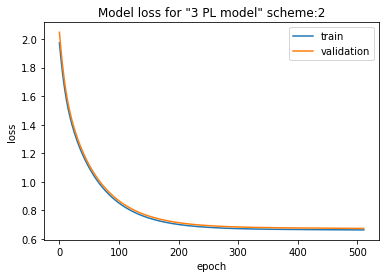

In [19]:
model.plot()#model scheme 2

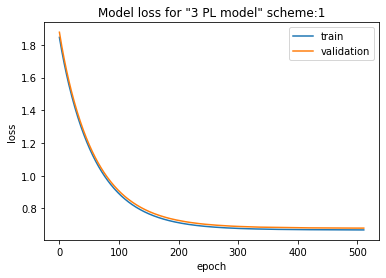

In [20]:
model_s1.plot()#model scheme 1

### 2.2. Obtaining underlying trained 3pl parameters from keras model

#### Access model coefficients
* vals of difficulty, disccrimination, guessing can be either obtained as a dict with `model.coefficient()`
* Or as model attribute with respective call-- `model.difficulty`, `model.discrimination`.

In [21]:
model.coefficients()#as method--dict

{'difficulty_level': array([[-0.33687466],
        [ 0.10872683],
        [ 1.091974  ]], dtype=float32), 'disc_param': array([[0.98975635],
        [0.86150694],
        [0.6069459 ]], dtype=float32), 'guessing_param': array([[0.0987363 ],
        [0.04040414],
        [0.03636248]], dtype=float32)}

In [22]:
model.discrimination#as attribute

array([[0.98975635],
       [0.86150694],
       [0.6069459 ]], dtype=float32)

## 3. Loading R's 3PL model paramters from simulated dataset for comparison


In [23]:
coeff = pd.read_csv('simulated_data_r_coeffs.csv')
coeff.head(3)

,Unnamed: 0,Gussng,Dffclt,Dscrmn
0,V1,0.048993,-0.539199,23.963986
1,V2,0.000008,0.044664,21.340652
2,V3,0.000003,0.695396,18.530009


In [24]:
r_params_cols =list(coeff.columns)
r_params_cols#columns from R's dataframe

['Unnamed: 0', 'Gussng', 'Dffclt', 'Dscrmn']

### 3.1. Table representation of param values: true_vals - keras - R

In [25]:
rel_items= list(range(1, df_sim['questions'].nunique()+1))

In [26]:
df_table= pd.DataFrame({'Questions': rel_items, 'Difficulty-True': t_diff, 'Difficulty-keras': model.difficulty.reshape(-1),
 'Difficulty-R':coeff[r_params_cols[2]].values, 'Discrimination-True':t_disc, 'Discrimination-keras':model.discrimination.reshape(-1),
 'Discrimination-R':coeff[r_params_cols[-1]].values, 'Guess-True':t_guess, 'Guess-keras':model.guessing.reshape(-1),
 'Guess-R':coeff[r_params_cols[2]].values})
df_table.head(5)

,Questions,Difficulty-True,Difficulty-keras,Difficulty-R,Discrimination-True,Discrimination-keras,Discrimination-R,Guess-True,Guess-keras,Guess-R
0,1,-0.5,-0.336875,-0.539199,0.0,0.989756,23.963986,0.0,0.098736,-0.539199
1,2,0.0,0.108727,0.044664,0.5,0.861507,21.340652,0.5,0.040404,0.044664
2,3,0.5,1.091974,0.695396,1.0,0.606946,18.530009,1.0,0.036362,0.695396


### 3.2. Rescaling comparison table data

In [27]:
df_scaled = df_table.copy()
for col in list(df_scaled.columns)[1:]:
    df_scaled[col] = df_scaled[col].apply(lambda x: x - df_table[col].min())
    df_scaled[col]=df_scaled[col]/df_scaled[col].max()
df_scaled

,Questions,Difficulty-True,Difficulty-keras,Difficulty-R,Discrimination-True,Discrimination-keras,Discrimination-R,Guess-True,Guess-keras,Guess-R
0,1,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.0,1.000000,0.000000
1,2,0.5,0.311861,0.472918,0.5,0.664979,0.517235,0.5,0.064797,0.472918
2,3,1.0,1.000000,1.000000,1.0,0.000000,0.000000,1.0,0.000000,1.000000


## 4. Scatterplots

### 4.1. Difficulty vals from keras_3pl vs. R_3pl

* R_tpm values are plotted across X
* Keras values are plotted across Y

In [28]:
comparison_cols= list(df_scaled.columns)
comparison_cols

['Questions',
 'Difficulty-True',
 'Difficulty-keras',
 'Difficulty-R',
 'Discrimination-True',
 'Discrimination-keras',
 'Discrimination-R',
 'Guess-True',
 'Guess-keras',
 'Guess-R']

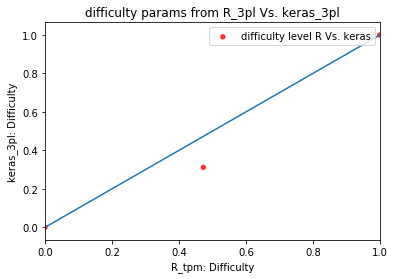

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y,x = (df_scaled[comparison_cols[2]].values, df_scaled[comparison_cols[3]].values)

x_min, x_max = ax.get_xlim()
y_min, y_max = 0, 0 + 1*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])

ax.scatter(x, y, alpha=0.8, c="red", edgecolors='none', s=30, label="difficulty level R Vs. keras")
#plt.plot([-0.6,0.6],[-0.1,0.3],'k-')
plt.title('difficulty params from R_3pl Vs. keras_3pl')
plt.ylabel('keras_3pl: Difficulty')
plt.xlabel('R_tpm: Difficulty')
plt.legend(loc=1)

plt.show()

### 4.2. Discrimination vals from keras_3pl vs. R_3pl

* R_tpm values are plotted across X
* Keras values are plotted across Y

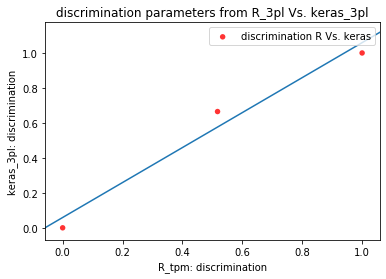

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y,x = (df_scaled[comparison_cols[5]].values, df_scaled[comparison_cols[6]].values)

ax.scatter(x, y, alpha=0.8, c="red", edgecolors='none', s=30, label="discrimination R Vs. keras")
x_min, x_max = ax.get_xlim()
y_min, y_max = 0, 0 + 1*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])

plt.title('discrimination parameters from R_3pl Vs. keras_3pl')
plt.ylabel('keras_3pl: discrimination')
plt.xlabel('R_tpm: discrimination')

plt.legend(loc=1)
plt.show()

### 4.3. Guessing param values from keras_3pl vs. R_3pl

* R_tpm values are plotted across X
* Keras values are plotted across Y


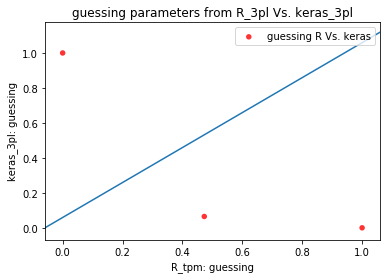

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y,x = (df_scaled[comparison_cols[8]].values, df_scaled[comparison_cols[-1]].values)

ax.scatter(x, y, alpha=0.8, c="red", edgecolors='none', s=30, label="guessing R Vs. keras")

x_min, x_max = ax.get_xlim()
y_min, y_max = 0, 0 + 1*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])

plt.title('guessing parameters from R_3pl Vs. keras_3pl')
plt.ylabel('keras_3pl: guessing')
plt.xlabel('R_tpm: guessing')

plt.legend(loc=1)
plt.show()

## 5. IC Curves
### 5.1. Item characteristic curves for all 3 items from simulated dataset with R tpm

In [32]:
def logit_func(lat_values):#c:guess, a:descrimination, b:difficulty
    prob = list()
    prob.append(c+ (1-c)*(np.exp(a*(lat_values-b))/(1+np.exp(a*(lat_values-b)))))#Vectorised implementation
    #for val in lat_values:
    #    prob.append(c+ (1-c)*(np.exp(a*(val-b))/(1+np.exp(a*(val-b)))))
    return prob

In [33]:
x = np.linspace(-4,4, num=num_sim_users)#value count for x axis

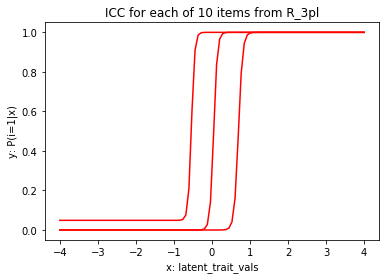

In [34]:
for i in range(coeff.shape[0]):
    c= coeff[r_params_cols[1]].iloc[i]#values of item 6 from R's dataframe
    a= coeff[r_params_cols[-1]].iloc[i]
    b= coeff[r_params_cols[2]].iloc[i]
    vals_r= logit_func(x)
    plt.plot(x,vals_r[0], 'r')

plt.title('ICC for each of 10 items from R_3pl')
plt.xlabel('x: latent_trait_vals')
plt.ylabel('y: P(i=1|x)')
plt.show()

### 5.2. Item characteristic curves for all items from simulated dataset with keras 3PL

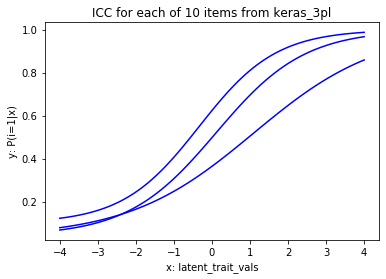

In [35]:
for i in range(len(rel_items)):#10 items
    c= model.guessing[i]#values for item 6 from keras 3pl params
    a= model.discrimination[i]
    b= model.difficulty[i]
    vals_keras= logit_func(x)
    plt.plot(x,vals_keras[0], 'b')

plt.title('ICC for each of 10 items from keras_3pl')
plt.xlabel('x: latent_trait_vals')
plt.ylabel('y: P(i=1|x)')
plt.show()#for mean=0 stdDev=1

_____________________

### Evaluating performance with dataset scheme 2

In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df_sim_s2[df_cols[:-1]], df_sim_s2[df_cols[-1]], test_size=0.05)

x_train_user = to_categorical(xtrain['user'], num_classes=num_sim_users)#contains the one-hot encoded user data
x_train_questions = pd.get_dummies(xtrain['questions']).values#contains the one-hot encoded questions

y_train= ytrain.values
print('shape of simulated x_train_user:', x_train_user.shape,'\nshape of simulated  x_train_questions:', x_train_questions.shape,
      '\nshape of simulated  y_train:',y_train.shape)

shape of simulated x_train_user: (9500, 100) 
shape of simulated  x_train_questions: (9500, 100) 
shape of simulated  y_train: (9500,)


* Model scheme 2- Dataset scheme 2

In [37]:
model_dset2= KerasTpm(param_scheme=2)
model_dset2.fit(x_user=x_train_user,x_questions=x_train_questions,
          y_vals=y_train, batch_size=64, epochs=512)


Intitializing fit for scheme 2. . .
Batch_size: 64; epochs: 512;

Training on : 9500 samples for : 512 epochs has completed in : 61.395 seconds.

Use object.plot() to view train/validation loss curves;
Use `object.history` to obtain train/validation loss across all the epochs.
Use `object.coefficients()` to obtain model parameters--difficulty, discrimination & guessing


* Model scheme 1- Dataset scheme 2

In [38]:
model_dset2_s1= KerasTpm(param_scheme=1)#fitting model scheme 1
model_dset2_s1.fit(x_user=x_train_user,x_questions=x_train_questions,
          y_vals=y_train, batch_size=64, epochs=512)


Intitializing fit for scheme 1. . .
Batch_size: 64; epochs: 512;

Training on : 9500 samples for : 512 epochs has completed in : 42.915 seconds.

Use object.plot() to view train/validation loss curves;
Use `object.history` to obtain train/validation loss across all the epochs.
Use `object.coefficients()` to obtain model parameters--difficulty, discrimination & guessing


### IC curves for dataset scheme 2
* Model scheme 2- Dataset scheme 2

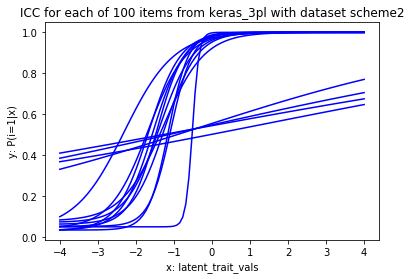

In [39]:
x = np.linspace(-4,4, num=num_sim_users)#value count for x axis

for i in np.random.randint(0,num_sim_items_s2,15):#15/100 random items
    c= model_dset2.guessing[i]#values for item 6 from keras 3pl params
    a= model_dset2.discrimination[i]
    b= model_dset2.difficulty[i]
    vals_keras= logit_func(x)
    plt.plot(x,vals_keras[0], 'b')

plt.title('ICC for each of 100 items from keras_3pl with dataset scheme2')
plt.xlabel('x: latent_trait_vals')
plt.ylabel('y: P(i=1|x)')
plt.show()#for mean=0 stdDev=1

* Model scheme 1- Dataset scheme 2

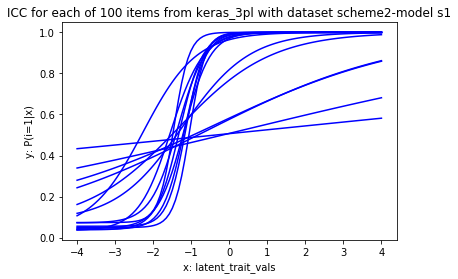

In [40]:
x = np.linspace(-4,4, num=num_sim_users)#value count for x axis

for i in np.random.randint(0,num_sim_items_s2,15):#15/100 random items
    c= model_dset2_s1.guessing[i]#values for item 6 from keras 3pl params
    a= model_dset2_s1.discrimination[i]
    b= model_dset2_s1.difficulty[i]
    vals_keras= logit_func(x)
    plt.plot(x,vals_keras[0], 'b')

plt.title('ICC for each of 100 items from keras_3pl with dataset scheme2-model s1')
plt.xlabel('x: latent_trait_vals')
plt.ylabel('y: P(i=1|x)')
plt.show()#for mean=0 stdDev=1

________________________________

________________________________

* Trying above `kerasTpm` class on 500 users-100 question dataset from previous experiments

* Defining & one hot encoding training data for 500 users/10 items dataset

In [105]:
import pandas as pd
import numpy as np
#from numpy.random import seed
#seed(1)

cols= ['Q{}'.format(idx) for idx in range(1,11)]
data= pd.read_csv('ouirt.dat', sep= ' ', names= cols)
num_users= data.shape[0]

rel_items = cols[:]#all Questions 1-10
df = data[rel_items]

df_cols = ['user','questions', 'response']#final dataframe cols


from collections import defaultdict
di = defaultdict(dict)
for idx in rel_items:
    di[idx].update(zip(range(df.shape[0]), df[idx].values))#makes format {'Q1':{user:responses,1:0,2:0,. . .,}}
    
df_list= list()
for ques, user_resp in list(zip(di.keys(), di.values())):
    df_list.append({'user':list(user_resp.keys()), 'questions':[ques]*df.shape[0], 'response':list(user_resp.values())})


df_new= pd.DataFrame()
for i in range(len(df_list)):
    df = pd.DataFrame(df_list[i])
    df_new= pd.concat([df_new, df], ignore_index=True)

df_new = df_new.loc[np.random.randint(0,df_new.shape[0]-1, size=df_new.shape[0])]#shuffling data
df_new.head(4)

,user,questions,response
3047,47,Q7,0
1762,262,Q4,0
4688,188,Q10,0
4944,444,Q10,0


In [106]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df_new[df_cols[:-1]], df_new[df_cols[-1]], test_size=0.05)

x_train_user = to_categorical(xtrain['user'], num_classes=500)#contains the one-hot encoded user data
x_train_questions = pd.get_dummies(xtrain['questions']).values#contains the one-hot encoded questions

y_train= ytrain.values
print('shape of x_train_user:', x_train_user.shape,'\nshape of x_train_questions:', x_train_questions.shape,
      '\nshape of y_train:',y_train.shape)

shape of x_train_user: (4750, 500) 
shape of x_train_questions: (4750, 10) 
shape of y_train: (4750,)


In [107]:
model_new = KerasTpm(param_scheme=2)

In [108]:
model_new.fit(x_user=x_train_user, x_questions=x_train_questions, y_vals=y_train)

Training on : 4750 samples for : 256 epochs has completed in : 72.829 seconds

Use object.plot() to view train/validation loss curves;
Use `object.history` to obtain train/validation loss across all the epochs.


In [110]:
model_new.coefficients()

{'difficulty_level': array([[ 1.7484826 ],
        [ 1.3637425 ],
        [-0.06572728],
        [-2.0869205 ],
        [ 0.42030376],
        [ 0.8208786 ],
        [ 0.7915219 ],
        [ 0.17101066],
        [-1.355569  ],
        [ 0.6289362 ]], dtype=float32), 'disc_param': array([[ 1.0474744e+00],
        [ 3.4495850e+00],
        [ 4.6170666e-05],
        [ 1.2458811e-03],
        [ 2.5819585e+00],
        [ 5.1926643e-01],
        [ 1.0147814e+00],
        [ 2.5894122e+00],
        [-0.0000000e+00],
        [ 1.2717327e+00]], dtype=float32), 'guessing_param': array([[-2.9671865],
        [-2.7237215],
        [-4.035815 ],
        [-3.7261267],
        [-3.2720625],
        [-2.7150326],
        [-3.0055723],
        [-2.5045724],
        [-3.695909 ],
        [-2.998019 ]], dtype=float32)}

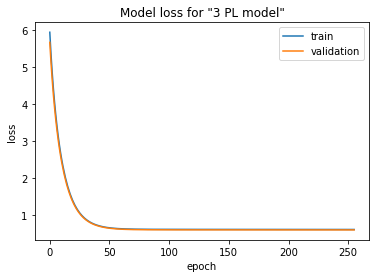

In [111]:
model_new.plot()